<a href="https://colab.research.google.com/github/hminh1012/4_input_XOR_gate/blob/main/CNN___MTCNN_vs_Haarcascade_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
olgabelitskaya_yale_face_database_path = kagglehub.dataset_download('olgabelitskaya/yale-face-database')

print('Data source import complete.')


Using Colab cache for faster access to the 'yale-face-database' dataset.
Data source import complete.


In [2]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
%matplotlib inline



## Yalefaces dataset  was created locally using yale-faces-database dataset and the commented cells below.
## The exact structure of yalefaces dataset is required in order to use split-folders library

In [11]:
def rename_files(path):
    for filename in os.listdir(path):
        if filename!='Readme.txt' and  not filename.endswith('.jpg') :

            dst = filename + '.jpg'
            src = os.path.join(path, filename)
            dst = os.path.join(path, dst)
            os.rename(src, dst)





In [15]:
#for each  subject in the data folder create a new folder in the data folder
#and move all the images of that subject to that folder
def split_files(path):
    for filename in os.listdir(path):
        if  filename.endswith('.jpg') :
         #split the name of the file to get the subject name
            subject_name=filename.split('.')[0]
        #create a new folder for each subject
            if not os.path.exists(os.path.join(path,subject_name)):
                os.makedirs(os.path.join(path,subject_name))
        #move the file to the new folder
            src = os.path.join(path, filename)
            dst = os.path.join(path, subject_name, filename)
            os.rename(src, dst)


# The dataset is downloaded to the default Kaggle data directory in Colab
YaleFacesPath="/kaggle/input/yale-face-database/data"
if not os.path.exists(os.path.join(YaleFacesPath,'subject01')):
       split_files(YaleFacesPath)

In [16]:
!pip install split-folders

In [17]:
import splitfolders
import os



In [18]:
import shutil

# Define the source and destination paths
source_path = "/kaggle/input/yale-face-database/data"
destination_path = "/content/yale-face-database"

# Copy the data to a writable directory
if not os.path.exists(destination_path):
    shutil.copytree(source_path, destination_path)
    print(f"Data copied from {source_path} to {destination_path}")
else:
    print(f"Destination directory {destination_path} already exists. Skipping copy.")

Data copied from /kaggle/input/yale-face-database/data to /content/yale-face-database


In [19]:
def rename_files(path):
    for filename in os.listdir(path):
        if filename!='Readme.txt' and  not filename.endswith('.jpg') :

            dst = filename + '.jpg'
            src = os.path.join(path, filename)
            dst = os.path.join(path, dst)
            os.rename(src, dst)



# Rename files in the writable directory
YaleFacesPath="/content/yale-face-database"
rename_files(YaleFacesPath)

In [20]:
#for each  subject in the data folder create a new folder in the data folder
#and move all the images of that subject to that folder
def split_files(path):
    for filename in os.listdir(path):
        if  filename.endswith('.jpg') :
         #split the name of the file to get the subject name
            subject_name=filename.split('.')[0]
        #create a new folder for each subject
            if not os.path.exists(os.path.join(path,subject_name)):
                os.makedirs(os.path.join(path,subject_name))
        #move the file to the new folder
            src = os.path.join(path, filename)
            dst = os.path.join(path, subject_name, filename)
            os.rename(src, dst)


# Split files in the writable directory
YaleFacesPath="/content/yale-face-database"
if not os.path.exists(os.path.join(YaleFacesPath,'subject01')):
       split_files(YaleFacesPath)

In [21]:
import splitfolders
import os

# The dataset is now in the writable directory
YaleFacesPath="/content/yale-face-database"
#if output folder already exists delete it
if not os.path.exists("./output"):

    splitfolders.ratio(YaleFacesPath, seed=1337, ratio=(.8, .1, .1))

Copying files: 165 files [00:00, 1211.82 files/s]


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


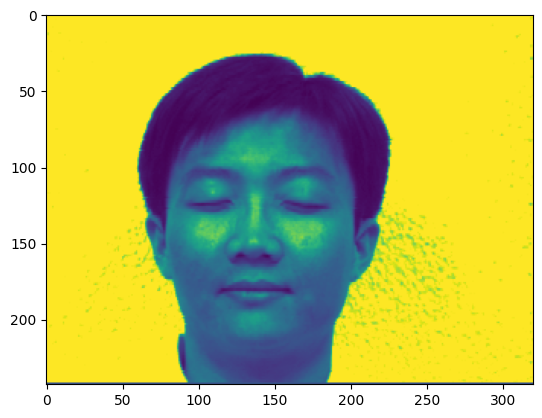

In [23]:
img=plt.imread('./output/test/subject14/subject14.sleepy.jpg')
plt.imshow(img)
plt.show()

In [24]:
#use train and val folders to train the model
train_path=os.path.join("./output",'train')
val_path=os.path.join("./output",'val')
test_path=os.path.join("./output",'test')


In [25]:
def split_data(path):
    images=[]
    labels=[]
    for filename in os.listdir(path):
        if filename.endswith('.jpg'):
            image=plt.imread(os.path.join(path,filename))
            images.append(image)
            labels.append(filename.split('.')[0])
    return images,labels

In [26]:
#for each subject in the train folder split the images and labels
#look in each subfolder and get the images and labels

def data_split(path):

    images=[]
    labels=[]
    for subject in os.listdir(path):
        if os.path.isdir(os.path.join(path,subject)):
            subject_path=os.path.join(path,subject)
            subject_images,subject_labels=split_data(subject_path)
            images.extend(subject_images)
            labels.extend(subject_labels)
    return images,labels

In [27]:
X_train,y_train=data_split(train_path)
X_val,y_val=data_split(val_path)
X_test,y_test=data_split(test_path)


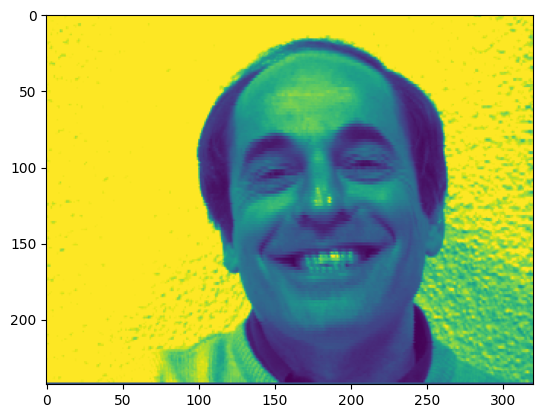

In [28]:
#show the first image of the train folder
plt.imshow(X_train[0])
plt.show()


In [29]:
#get unique values of a list
labels=[]
for i in range(len(y_train)):
    if y_train[i] not in labels:
        labels.append(y_train[i])

print(labels)

['subject12', 'subject08', 'subject09', 'subject02', 'subject05', 'subject10', 'subject06', 'subject11', 'subject04', 'subject01', 'subject14', 'subject13', 'subject07', 'subject03', 'subject15']


In [30]:
print(np.array(X_train).shape)
print(np.array(y_train).shape)


(120, 243, 320)
(120,)


# Face detection with MTCNN


In [31]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.1 MB/s eta 0:00:00


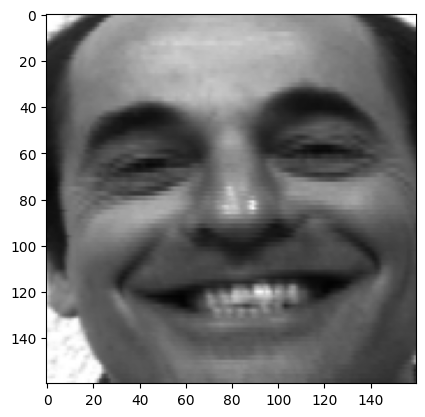

In [32]:
#import mtcnn
from mtcnn.mtcnn import MTCNN


#create a detector
detector = MTCNN()
#detect face in a single image
def detect_face(image):
    #convert the image to RGB
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    image=np.array(image)
    #detect faces in the image
    result=detector.detect_faces(image)
    #if no face is detected return an empty list
    if len(result)==0:
        return []
    #extract the bounding box of the face
    x1,y1,width,height=result[0]['box']
    #extract the face
    x1,y1,width,height=x1,y1,width,height
    face=image[y1:y1+height,x1:x1+width]
    #resize the face to a fixed size
    face=cv2.resize(face,(160,160))
    return face


#get  faces  and resize the images to a fixed size
def get_faces(images):
    return list(map(lambda x:detect_face(x),images))




face=detect_face(X_train[0])
plt.imshow(face)
plt.show()



In [33]:
X_train_data=get_faces(X_train)
X_val_data=get_faces(X_val)
X_test_data=get_faces(X_test)


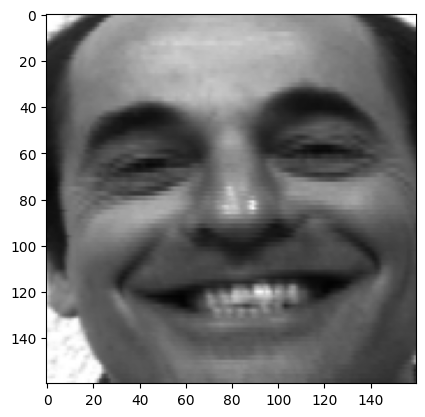

In [34]:
#show a random image from the train folder
plt.imshow(X_train_data[np.random.randint(0,len(X_train))])

In [35]:
#prepare the data for the model
X_train_data=np.array(X_train_data)
X_val_data=np.array(X_val_data)
X_test_data=np.array(X_test_data)


#convert the labels tp numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_val=label_encoder.fit_transform(y_val)
y_test=label_encoder.fit_transform(y_test)

#show the shape of the data
print(X_train_data.shape)
print(X_val_data.shape)
print(X_test_data.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(120, 160, 160, 3)
(15, 160, 160, 3)
(30, 160, 160, 3)
(120,)
(15,)
(30,)


In [36]:
#tensors
import tensorflow as tf

X_train_tensor=tf.convert_to_tensor(X_train_data,dtype=tf.float32)
X_val_tensor=tf.convert_to_tensor(X_val_data,dtype=tf.float32)
X_test_tensor=tf.convert_to_tensor(X_test_data,dtype=tf.float32)

In [37]:
#IMAGE DATA GENERATOR
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#create the image data generator
image_data_generator=ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'

)
train_image_generator=image_data_generator.flow(X_train_tensor,y_train,batch_size=32)
val_image_generator=image_data_generator.flow(X_val_tensor,y_val,batch_size=32)
test_image_generator=image_data_generator.flow(X_test_tensor,y_test,batch_size=32)


In [38]:
#sequential model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras import regularizers


In [39]:
#create the model
model=Sequential()
#add convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(160,160,3))) #3 on mtcnn 1 on cv2
# #model add dropout
model.add(Dropout(0.2))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# #model add dropout
model.add(Dropout(0.2))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#add convolutional layer
model.add(Conv2D(filters=96,kernel_size=(3,3),padding='Same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model add dropout
model.add(Dropout(0.2))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#add convolutional layer
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))

# model add dropout
model.add(Dropout(0.2))

#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#flatten the data
model.add(Flatten())
#add fully connected layer
model.add(Dense(512,activation='relu'))

#model add dropout
model.add(Dropout(0.5))
model.add(Dense(15,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:

epochs=100

# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience = 5,
                                        restore_best_weights = True)


from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 40, 40, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,747,311 (25.74 MB)

 Trainable params: 6,747,311 (25.74 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
History=model.fit(train_image_generator,epochs=epochs,validation_data=val_image_generator,callbacks=[early_stopping,red_lr])


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.0915 - loss: 3.1044 - val_accuracy: 0.2000 - val_loss: 2.9109 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1333 - loss: 2.9023 - val_accuracy: 0.0667 - val_loss: 2.8726 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0796 - loss: 2.8788 - val_accuracy: 0.2000 - val_loss: 2.8040 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1884 - loss: 2.6878 - val_accuracy: 0.6667 - val_loss: 2.5831 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2873 - loss: 2.4457 - val_accuracy: 0.8667 - val_loss: 2.1939 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3591 - loss: 2.1974 - val_accuracy: 0.8667 - val_loss: 1.9531 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5583 - loss: 1.5667 - val_accuracy: 0.9333 - val_

## Evalutation of model train with MTCNN face embeddings

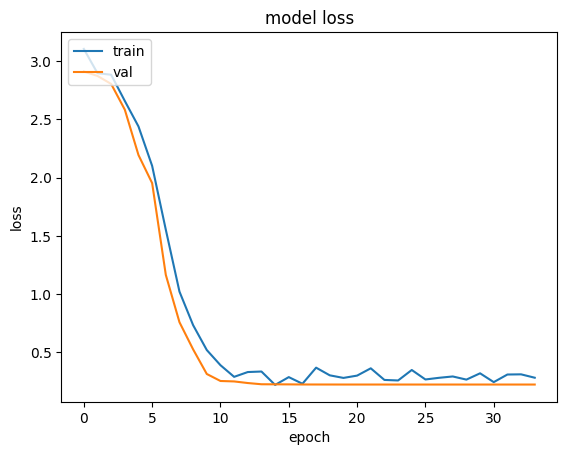

In [44]:
#plot the training and validation loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()


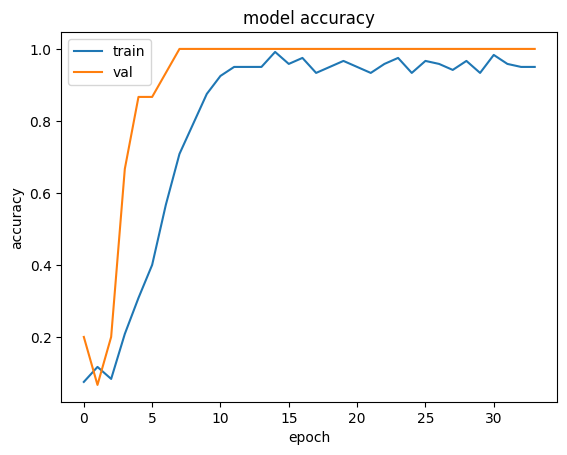

In [45]:
#plot the training and validation accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()


In [46]:
#evaluate the model
score=model.evaluate(X_test_tensor,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
model.layers
#model parameters
model.summary()
#model output shape
model.output_shape


Test loss: 9.696341514587402
Test accuracy: 0.9333333373069763


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 40, 40, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 40, 40, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,241,935 (77.22 MB)

 Trainable params: 6,747,311 (25.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,494,624 (51.48 MB)

(None, 15)

## Model prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


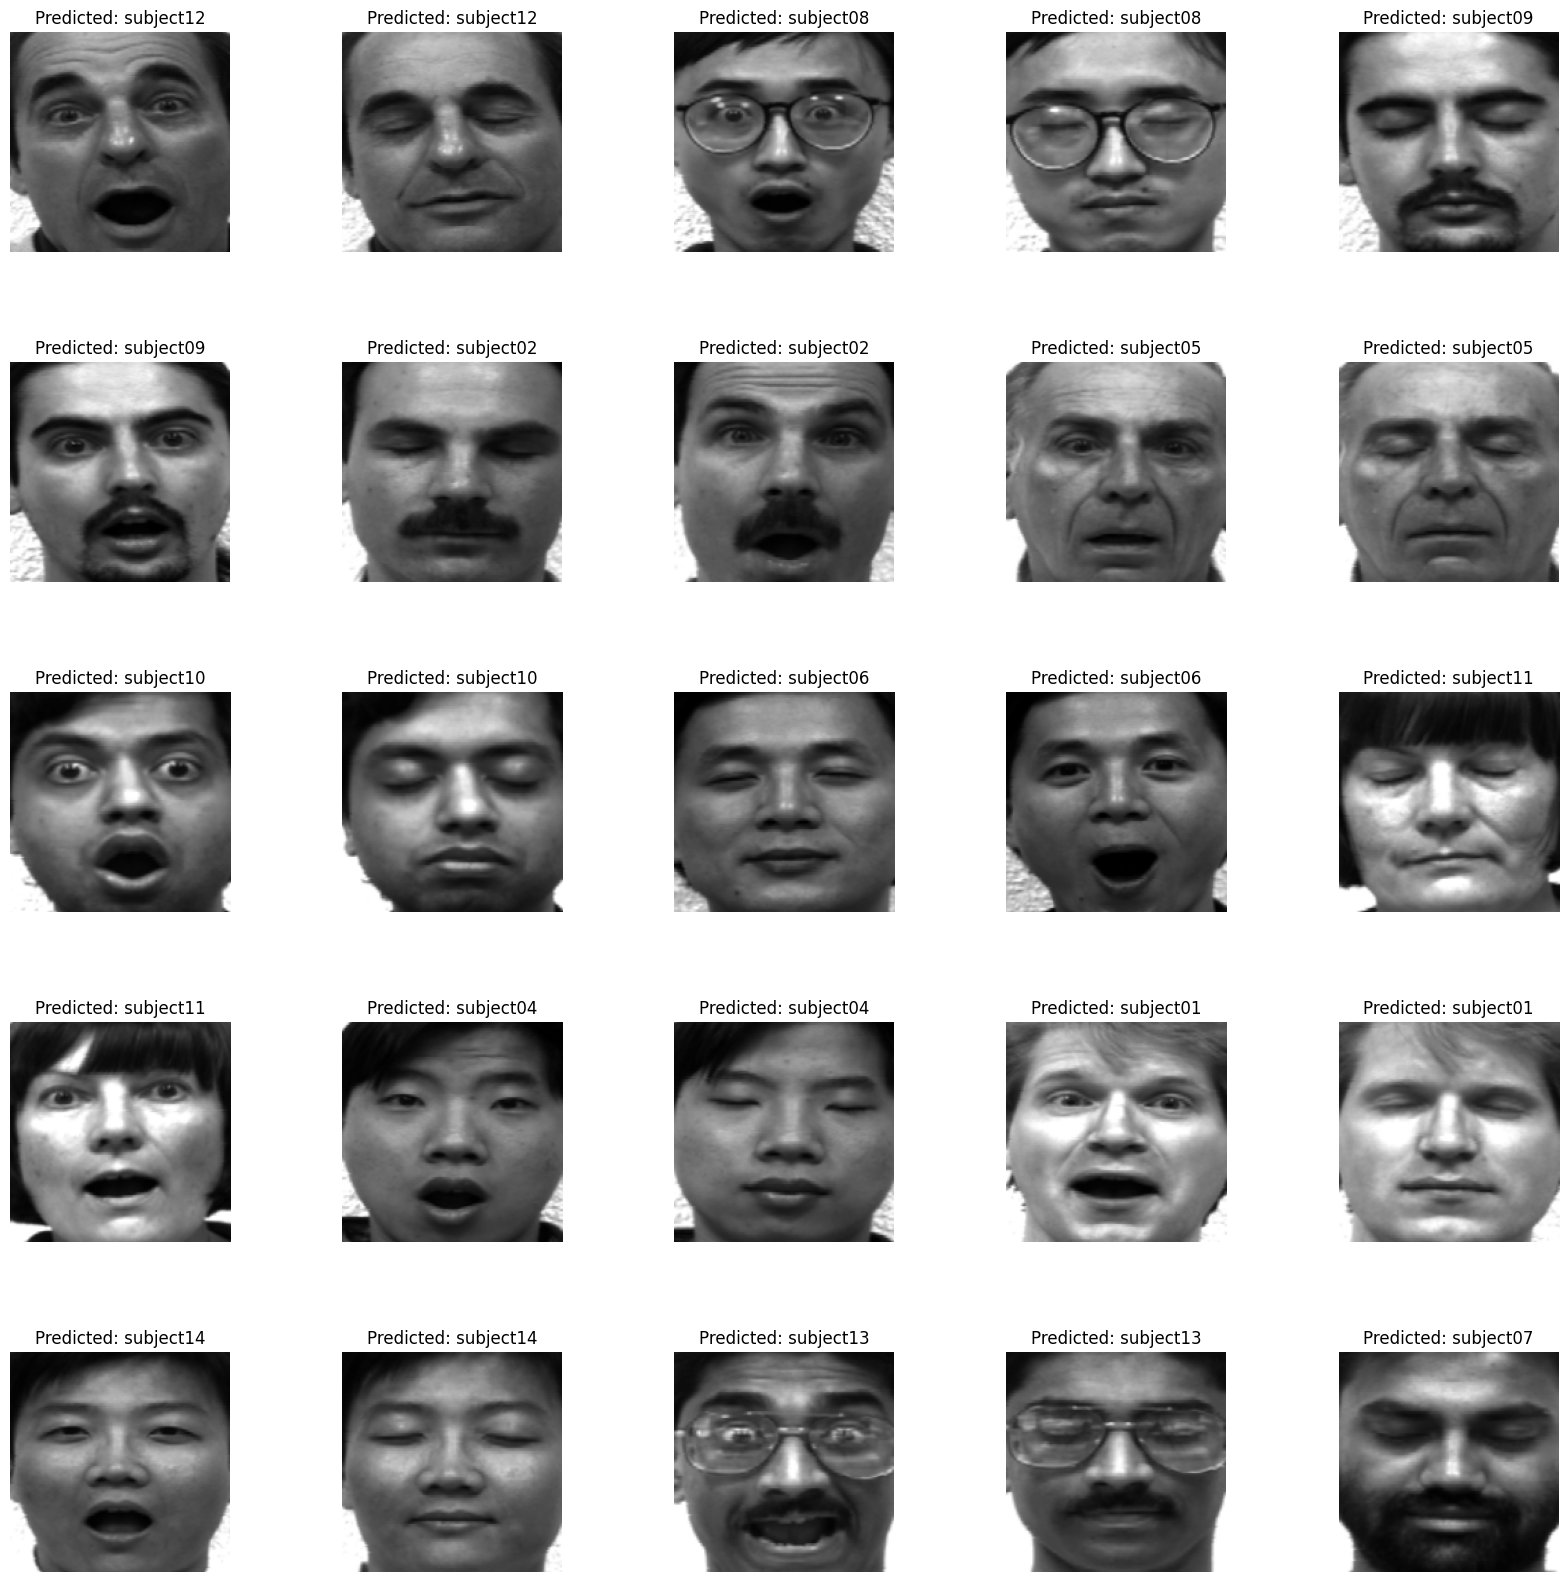

In [47]:
#current preditciton
subjects=['subject01','subject02','subject03','subject04','subject05','subject06','subject07','subject08','subject09','subject10','subject11','subject12','subject13','subject14','subject15']
currpred=model.predict(X_test_tensor)

fig,axes=plt.subplots(5,5,figsize=(20,20))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
#iterate over the 5x5 grid of subplots
for i,ax in enumerate(axes.flat):
    #plot image
    ax.imshow(X_test_data[i])
    #get label from one-hot vector
    label=np.argmax(currpred[i])
    #get correct answer
    answer=y_test[i]
    #label the image with the answer
    if answer==label:
       ax.set_title("Predicted: "+subjects[answer])
    else:
       ax.set_title("Not Predicted: "+subjects[answer])
    ax.set_axis_off()
plt.show()







In [48]:
#save new model
if(score[1]>=0.966 and score[0]<=20):
    model.save('newbestmodel.h5')
    print('model saved')
else:
    print('model not saved')



model not saved


# Face detection with Haar Cascade Classifier



In [59]:
#detect faces in the images
def detect_faces(image):
 #use PIL
    image=Image.fromarray(image)
    image=np.array(image)

    # Find the path to the Haar Cascade XML file
    haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'

    #detect faces
    detector=cv2.CascadeClassifier(haar_cascade_path)
    faces=detector.detectMultiScale(  image,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(20, 20)
    )
    return faces

#resize the faces
def get_face(image):
    faces=detect_faces(image)
    if len(faces)>0:
        x,y,w,h=faces[0]
        face_image=image[y:y+h,x:x+w]
        #cut the face from the image

        face_image=cv2.resize(face_image,(160,160))

        return face_image
    else:
        return None

def get_faces(images):
    return list(map(lambda x:get_face(x),images))

In [60]:
X_train_data=get_faces(X_train)


X_val_data=get_faces(X_val)

X_test_data=get_faces(X_test)


In [57]:
import cv2
import os

# Find the path to the Haar Cascade XML file
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'

# Check if the file exists
if os.path.exists(haar_cascade_path):
    print(f"Haar Cascade XML file found at: {haar_cascade_path}")
else:
    print(f"Haar Cascade XML file not found at: {haar_cascade_path}")

Haar Cascade XML file found at: /usr/local/lib/python3.12/dist-packages/cv2/data/haarcascade_frontalface_default.xml


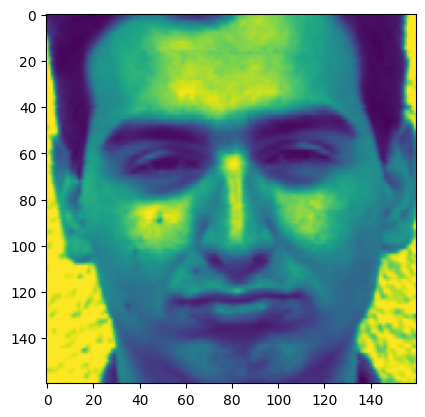

In [61]:
plt.imshow(X_train_data[np.random.randint(0,len(X_train))])

In [62]:
#prepare the data for the model
X_train_data=np.array(X_train_data)
X_val_data=np.array(X_val_data)
X_test_data=np.array(X_test_data)

# convert images shape to (samples,width,height,channels) if not fed in mtcnn
X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],X_train_data.shape[2],1))
X_val_data=np.reshape(X_val_data,(X_val_data.shape[0],X_val_data.shape[1],X_val_data.shape[2],1))
X_test_data=np.reshape(X_test_data,(X_test_data.shape[0],X_test_data.shape[1],X_test_data.shape[2],1))

#convert the labels tp numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_val=label_encoder.fit_transform(y_val)
y_test=label_encoder.fit_transform(y_test)

#show the shape of the data
print(X_train_data.shape)
print(X_val_data.shape)
print(X_test_data.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(120, 160, 160, 1)
(15, 160, 160, 1)
(30, 160, 160, 1)
(120,)
(15,)
(30,)


In [63]:


X_train_tensor=tf.convert_to_tensor(X_train_data,dtype=tf.float32)
X_val_tensor=tf.convert_to_tensor(X_val_data,dtype=tf.float32)
X_test_tensor=tf.convert_to_tensor(X_test_data,dtype=tf.float32)

In [64]:


#create the image data generator
image_data_generator=ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'

)
train_image_generator=image_data_generator.flow(X_train_tensor,y_train,batch_size=32)
val_image_generator=image_data_generator.flow(X_val_tensor,y_val,batch_size=32)
test_image_generator=image_data_generator.flow(X_test_tensor,y_test,batch_size=32)


In [65]:
#create the model
model=Sequential()
#add convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='Same',activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(160,160,1))) #3 on mtcnn 1 on cv2
# #model add dropout
model.add(Dropout(0.2))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
# #model add dropout
model.add(Dropout(0.2))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#add convolutional layer
model.add(Conv2D(filters=96,kernel_size=(3,3),padding='Same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
#model add dropout
model.add(Dropout(0.2))
#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#add convolutional layer
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same',activation='relu',kernel_regularizer=regularizers.l2(0.001)))

# model add dropout
model.add(Dropout(0.2))

#add max pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#flatten the data
model.add(Flatten())
#add fully connected layer
model.add(Dense(512,activation='relu'))

#model add dropout
model.add(Dropout(0.5))
model.add(Dense(15,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 160, 160, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 40, 40, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,746,735 (25.74 MB)

 Trainable params: 6,746,735 (25.74 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
History2=model.fit(train_image_generator,epochs=epochs,validation_data=val_image_generator,callbacks=[early_stopping,red_lr])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.0660 - loss: 3.0398 - val_accuracy: 0.2667 - val_loss: 2.8956 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1470 - loss: 2.8906 - val_accuracy: 0.2000 - val_loss: 2.8753 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2223 - loss: 2.8389 - val_accuracy: 0.7333 - val_loss: 2.7675 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2799 - loss: 2.6299 - val_accuracy: 0.8000 - val_loss: 2.4372 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3866 - loss: 2.2580 - val_accuracy: 0.9333 - val_loss: 1.9196 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5635 - loss: 1.6762 - val_accuracy: 0.9333 - val_loss: 1.5002 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6794 - loss: 1.3126 - val_accuracy: 1.0000 - val_

## HaarCascade Model Evaluation

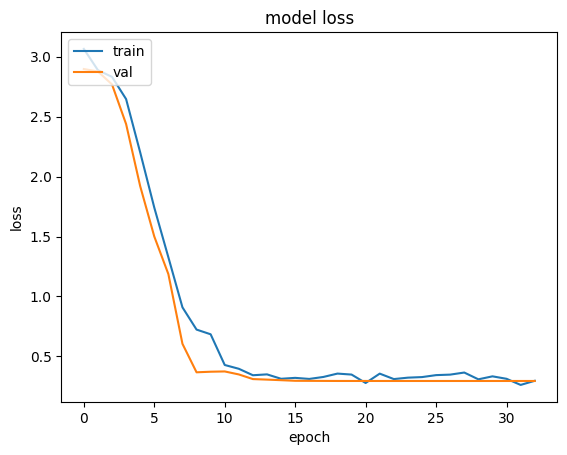

In [69]:
#plot the training and validation loss
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

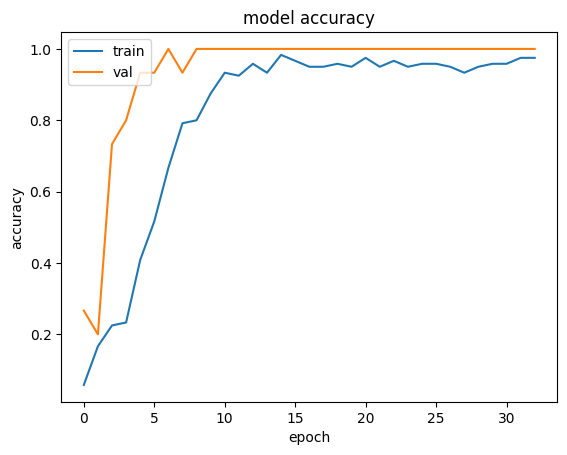

In [70]:
#plot the training and validation accuracy
plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()


## Haarcascade model prediction

In [71]:
#evaluate the model
score=model.evaluate(X_test_tensor,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])
model.layers
#model parameters
model.summary()
#model output shape
model.output_shape


Test loss: 17.887060165405273
Test accuracy: 0.8666666746139526


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 160, 160, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 160, 160, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 40, 40, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,240,207 (77.21 MB)

 Trainable params: 6,746,735 (25.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,493,472 (51.47 MB)

(None, 15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


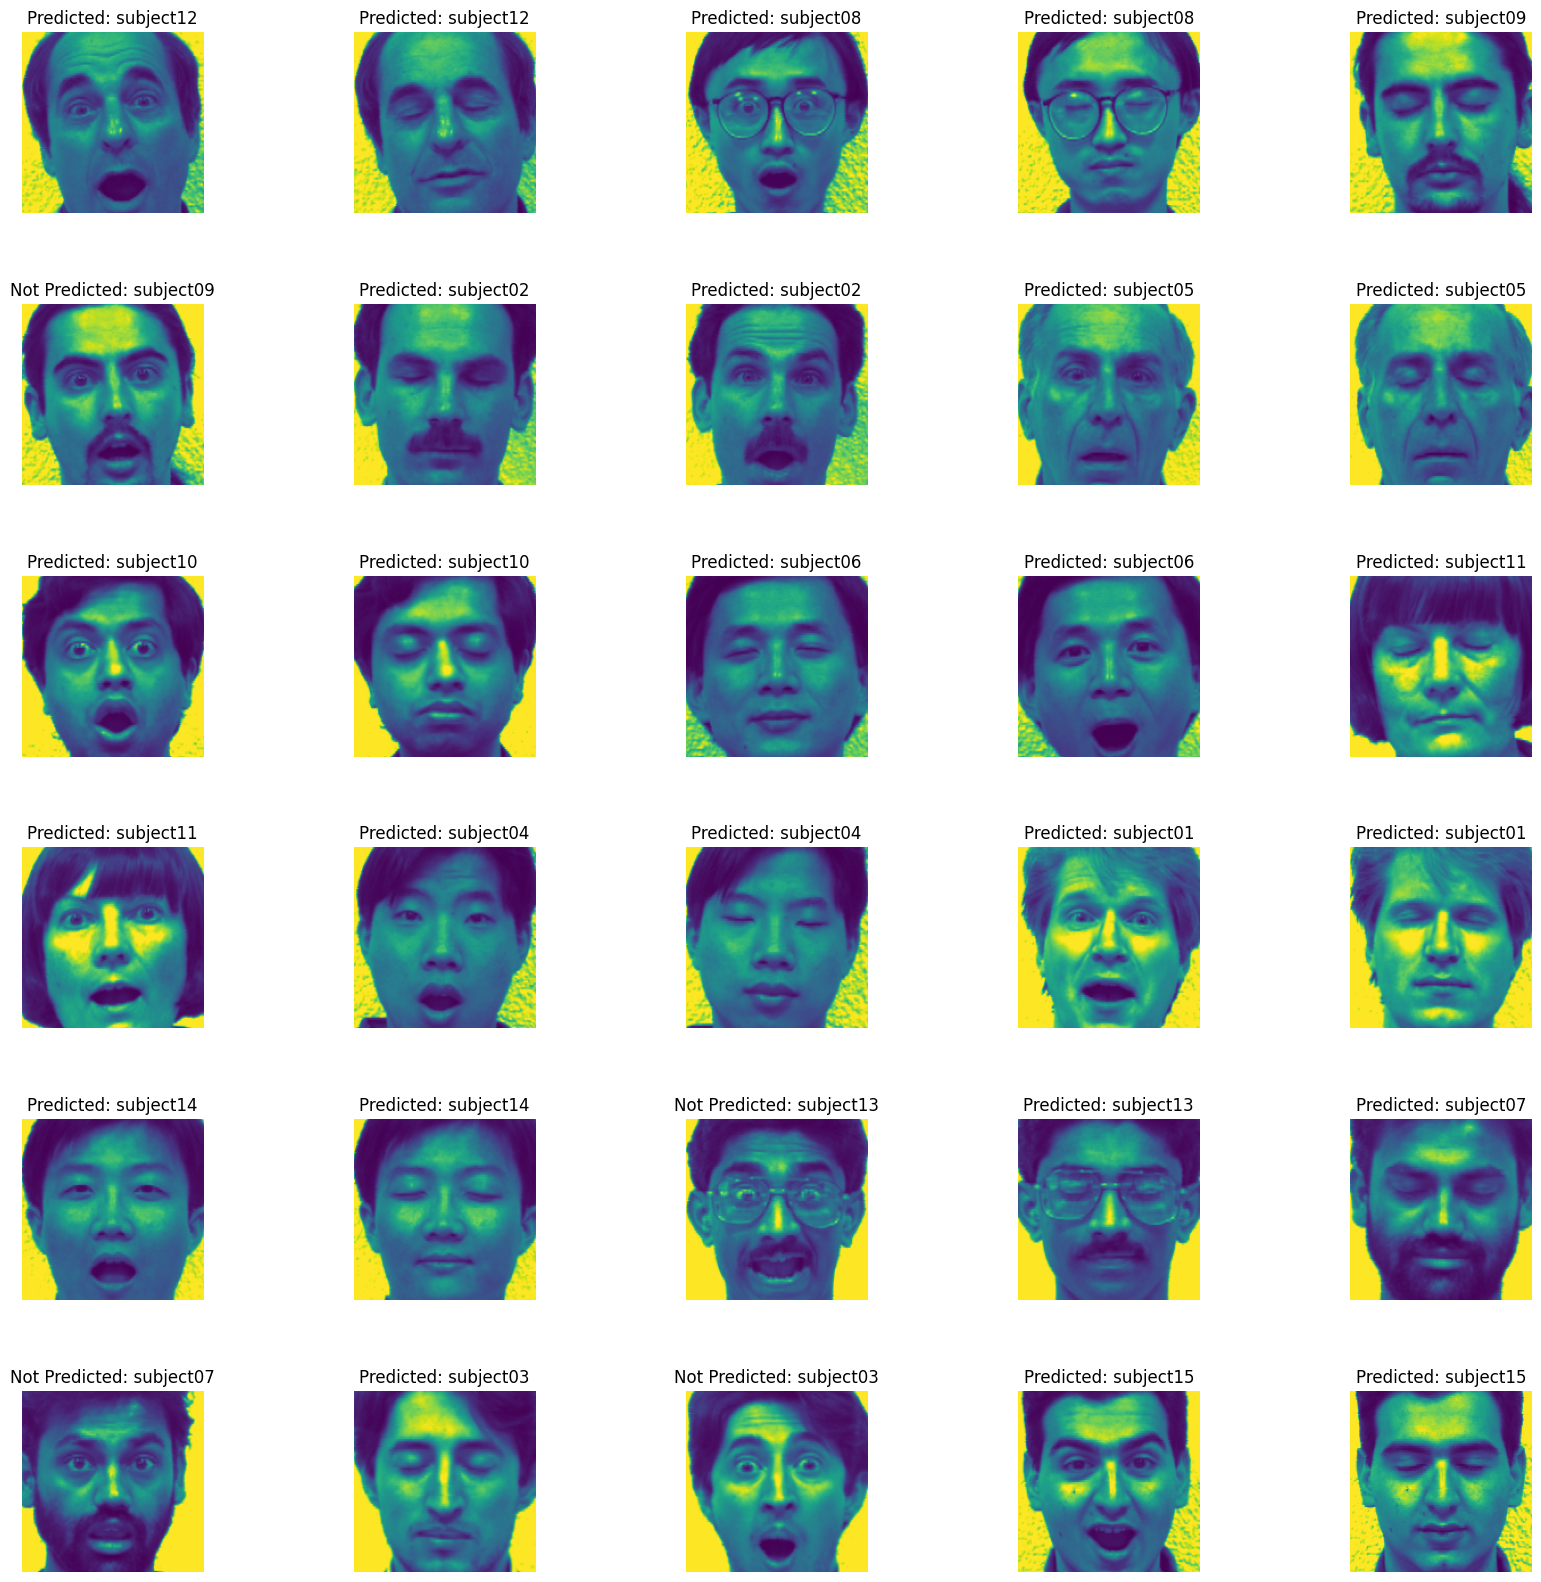

In [72]:
#current preditciton
currpred=model.predict(X_test_tensor)

fig,axes=plt.subplots(6,5,figsize=(20,20))
fig.subplots_adjust(hspace=0.5,wspace=0.5)
#iterate over the 5x5 grid of subplots
for i,ax in enumerate(axes.flat):
    #plot image
    ax.imshow(X_test_data[i])
    #get label from one-hot vector
    label=np.argmax(currpred[i])
    #get correct answer
    answer=y_test[i]
    #label the image with the answer
    if answer==label:
       ax.set_title("Predicted: "+subjects[answer])
    else:
       ax.set_title("Not Predicted: "+subjects[answer])
    ax.set_axis_off()
plt.show()




In [73]:
if(score[1]>=0.899 and score[0]<=33):
    model.save('newhaarmodel.h5')
    print('new model saved')
else:
    print('new model not saved')


new model not saved


## Comparison of the two models on loss and accuracy

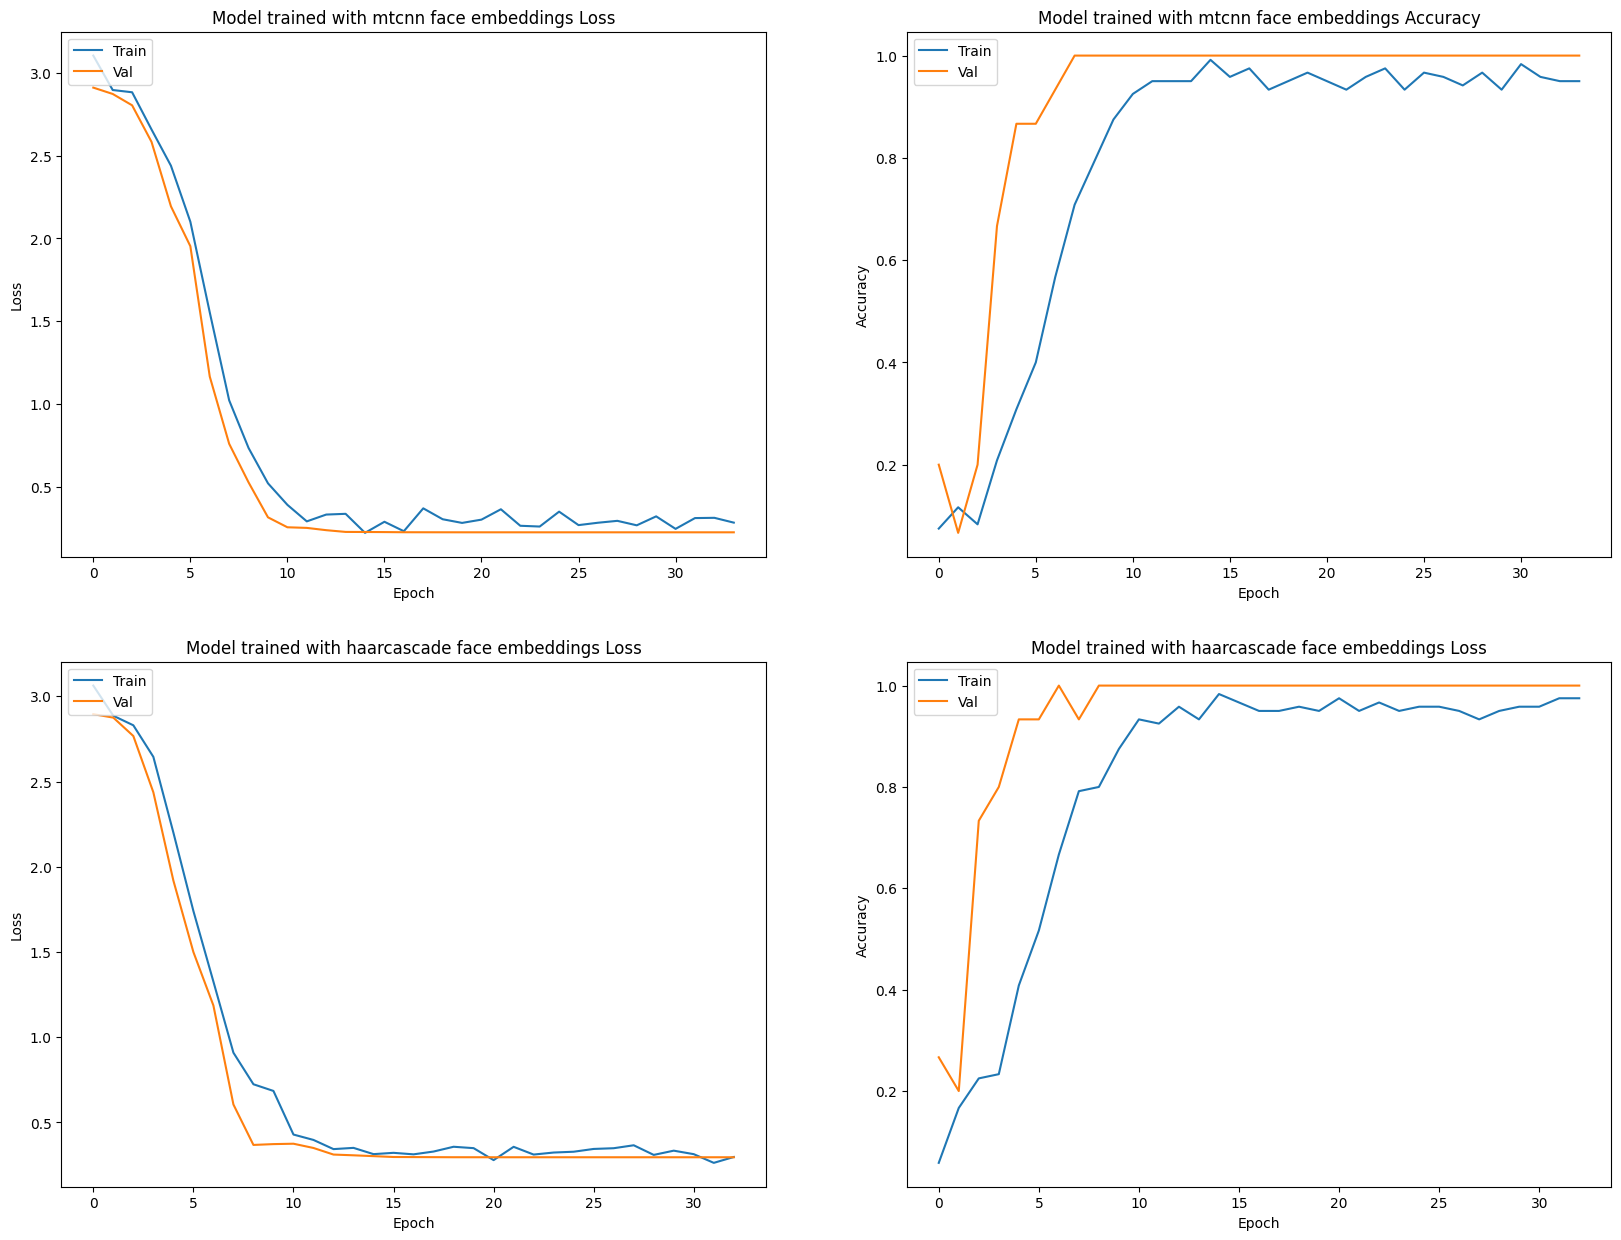

In [74]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20,15)
axs[0,0].plot(History.history['loss'])
axs[0,0].plot(History.history['val_loss'])
axs[0,0].set_title('Model trained with mtcnn face embeddings Loss')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_xlabel('Epoch')
axs[0,0].legend(['Train', 'Val'], loc='upper left')
axs[0,1].plot(History.history['accuracy'])
axs[0,1].plot(History.history['val_accuracy'])
axs[0,1].set_title('Model trained with mtcnn face embeddings Accuracy')
axs[0,1].set_ylabel('Accuracy')
axs[0,1].set_xlabel('Epoch')
axs[0,1].legend(['Train', 'Val'], loc='upper left')
axs[1,0].plot(History2.history['loss'])
axs[1,0].plot(History2.history['val_loss'])
axs[1,0].set_title('Model trained with haarcascade face embeddings Loss')
axs[1,0].set_ylabel('Loss')
axs[1,0].set_xlabel('Epoch')
axs[1,0].legend(['Train', 'Val'], loc='upper left')
axs[1,1].plot(History2.history['accuracy'])
axs[1,1].plot(History2.history['val_accuracy'])
axs[1,1].set_title('Model trained with haarcascade face embeddings Loss')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_xlabel('Epoch')
axs[1,1].legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.close()
